# When did Fake News propagate?

In [21]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
db_file = 'articles.db'
conn = sqlite3.connect(db_file, isolation_level=None,
                       detect_types=sqlite3.PARSE_COLNAMES)
db_df = pd.read_sql_query("SELECT date, source FROM articles", conn)



### Exploratory Analysis

In [3]:
db_df.head(3)

,date,source
0,2018-02-01,Addicting Info
1,2018-02-01,Addicting Info
2,2018-02-01,Addicting Info


In [4]:
db_df.tail(4)

,date,source
713530,2018-11-30,theRussophileorg
713531,2018-11-30,theRussophileorg
713532,2018-11-30,theRussophileorg
713533,2018-11-30,theRussophileorg


In [5]:
print(f"There are {db_df.shape[0]} data points.")

There are 713534 data points.


### Convert Column Types

In [6]:
db_df.dtypes

date      object
source    object
dtype: object

In [4]:
db_df.source = db_df['source'].astype('|S')
db_df['date']= pd.to_datetime(db_df['date'])
 
# Check the format of 'Date' column
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713534 entries, 0 to 713533
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    713534 non-null  datetime64[ns]
 1   source  713534 non-null  |S27          
dtypes: bytes216(1), datetime64[ns](1)
memory usage: 23.8 MB


### Vizualizations

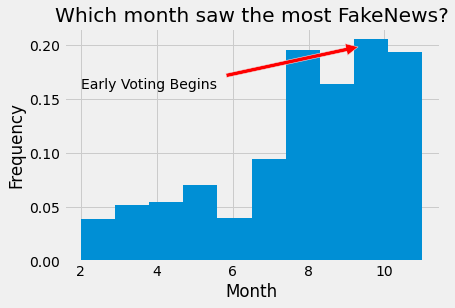

In [38]:
month = db_df.date.dt.month
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sources")
ax.set_title("Which month saw the most FakeNews?")
style.use('fivethirtyeight')
month.plot(kind="hist", bins=10, density=True)
#month.plot(kind="kde")
ax.annotate('Early Voting Begins', xy=(9.5, .20), xytext=(2, .16), arrowprops=dict(facecolor='red',
                                shrink=0.05),xycoords="data",)
plt.show()

In [17]:
conditions = [
    month.eq(12) | month.eq(1) | month.eq(2),
	month.eq(3) | month.eq(4) | month.eq(5),
	month.eq(6) | month.eq(7) | month.eq(8),
	month.eq(9) | month.eq(10) | month.eq(11)
]

values = ['winter', 'spring', 'summer', 'fall']
db_df["season"] = np.select(conditions, values)
db_df.tail()

,date,source,season
713529,2018-11-30,b'theRussophileorg',fall
713530,2018-11-30,b'theRussophileorg',fall
713531,2018-11-30,b'theRussophileorg',fall
713532,2018-11-30,b'theRussophileorg',fall
713533,2018-11-30,b'theRussophileorg',fall


<AxesSubplot:title={'center':'Which season saw the most FakeNews?'}, xlabel='Season', ylabel='Number of Sources'>

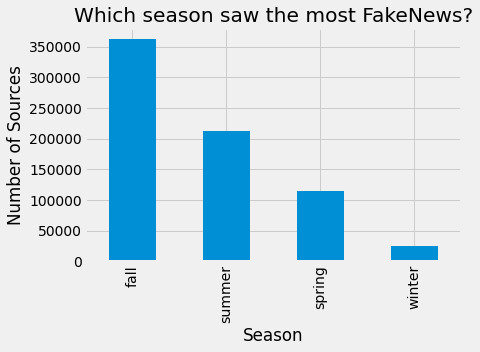

In [24]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("Season")
ax.set_ylabel("Number of Sources")
ax.set_title("Which season saw the most FakeNews?")


db_df.season.value_counts().plot(kind='bar')

In [25]:
db_df.season.value_counts()

fall      362167
summer    211960
spring    114421
winter     24986
Name: season, dtype: int64